## Combine Files

The script is for creating annula-mean T/S profiles from monthly EN4 data.

In [50]:
import xarray as xr
import numpy as np

In [51]:
ppdir = "/Volumes/Seagate_Hemant2/Work/Ocean/2021_Overturning_Subpolar_Atlantic/EN4_Met_Office/"

year1, year2 = (1900, 2021)

var_list = ['temperature', 'salinity', 'temperature_uncertainty', 'salinity_uncertainty']

In [52]:
for yr in range(year1, year2):
    
    ds = xr.open_mfdataset(ppdir + str(yr) + "/*nc")
    
    days = ds.time.dt.daysinmonth
    
    ds_mean = (ds.get(var_list) * days).mean('time') / days.mean('time')
    
    ds_mean['depth_bnds'] = ds['depth_bnds'].isel(time = 0)
        
    ds_mean = ds_mean.astype(np.float32).compute()
    
    save_file = ppdir + "annual/" + str(yr) + ".nc" 
    ds_mean.to_netcdf(save_file)
    
    #print("File saved for year = ", yr)

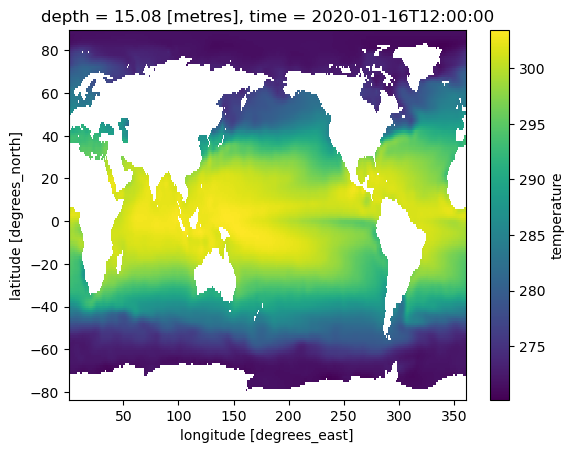

In [53]:
ds_mean.temperature.isel(depth=1).plot()